<a href="https://colab.research.google.com/github/lokeshpara/samplegit/blob/S9/EVA_session9_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/EVA/S9/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/EVA/S9


In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision
from tqdm import tqdm
import numpy as np
import torchvision.transforms as transforms
import albumentations
from albumentations.pytorch import ToTensor
import random
from models.gradcam_visualization import GradCAMView
import loader9
import model9
import train9
import test9

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer   dog  ship  bird


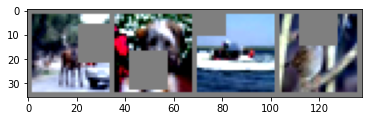

In [14]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader9.train_loader_Alb)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = model9.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [16]:
model =  model9.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9, weight_decay=0) 

loss_func=nn.CrossEntropyLoss()
 
for epoch in range(35):
    print("Epoch:", epoch)
    train9.train(model, device, loader9.train_loader_Albumentation, optimizer, loss_func, epoch)
    # scheduler.step()
    test9.test(model, device, loader9.test_loader,loss_func,last_epoch=True)

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 0


Epoch= 0 Loss=1.651573896408081 Batch_id=781 Accuracy=39.45: 100%|██████████| 782/782 [00:30<00:00, 25.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 4539/10000 (45.39%)

Epoch: 1


Epoch= 1 Loss=0.7507995963096619 Batch_id=781 Accuracy=57.71: 100%|██████████| 782/782 [00:29<00:00, 26.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 6332/10000 (63.32%)

Epoch: 2


Epoch= 2 Loss=1.283780813217163 Batch_id=781 Accuracy=67.23: 100%|██████████| 782/782 [00:30<00:00, 25.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0134, Accuracy: 7102/10000 (71.02%)

Epoch: 3


Epoch= 3 Loss=1.0962655544281006 Batch_id=781 Accuracy=72.75: 100%|██████████| 782/782 [00:30<00:00, 26.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 7667/10000 (76.67%)

Epoch: 4


Epoch= 4 Loss=0.9797083139419556 Batch_id=781 Accuracy=77.10: 100%|██████████| 782/782 [00:30<00:00, 25.76it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 7644/10000 (76.44%)

Epoch: 5


Epoch= 5 Loss=0.7200608849525452 Batch_id=781 Accuracy=80.15: 100%|██████████| 782/782 [00:30<00:00, 26.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0098, Accuracy: 7917/10000 (79.17%)

Epoch: 6


Epoch= 6 Loss=0.3724842071533203 Batch_id=781 Accuracy=82.43: 100%|██████████| 782/782 [00:30<00:00, 26.03it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 8259/10000 (82.59%)

Epoch: 7


Epoch= 7 Loss=0.6652519702911377 Batch_id=781 Accuracy=84.05: 100%|██████████| 782/782 [00:30<00:00, 26.04it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8296/10000 (82.96%)

Epoch: 8


Epoch= 8 Loss=0.5987169742584229 Batch_id=781 Accuracy=85.82: 100%|██████████| 782/782 [00:30<00:00, 25.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 8247/10000 (82.47%)

Epoch: 9


Epoch= 9 Loss=0.7865471839904785 Batch_id=781 Accuracy=87.04: 100%|██████████| 782/782 [00:30<00:00, 25.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8320/10000 (83.20%)

Epoch: 10


Epoch= 10 Loss=0.29263970255851746 Batch_id=781 Accuracy=88.32: 100%|██████████| 782/782 [00:30<00:00, 25.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 8559/10000 (85.59%)

Epoch: 11


Epoch= 11 Loss=0.47455888986587524 Batch_id=781 Accuracy=89.53: 100%|██████████| 782/782 [00:30<00:00, 25.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 8605/10000 (86.05%)

Epoch: 12


Epoch= 12 Loss=0.22109970450401306 Batch_id=781 Accuracy=90.21: 100%|██████████| 782/782 [00:30<00:00, 26.00it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8469/10000 (84.69%)

Epoch: 13


Epoch= 13 Loss=0.5347608327865601 Batch_id=781 Accuracy=91.37: 100%|██████████| 782/782 [00:30<00:00, 25.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 8648/10000 (86.48%)

Epoch: 14


Epoch= 14 Loss=0.15060006082057953 Batch_id=781 Accuracy=92.08: 100%|██████████| 782/782 [00:30<00:00, 25.77it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8599/10000 (85.99%)

Epoch: 15


Epoch= 15 Loss=0.19882220029830933 Batch_id=781 Accuracy=92.91: 100%|██████████| 782/782 [00:30<00:00, 25.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 8624/10000 (86.24%)

Epoch: 16


Epoch= 16 Loss=0.8787494897842407 Batch_id=781 Accuracy=93.34: 100%|██████████| 782/782 [00:30<00:00, 25.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8532/10000 (85.32%)

Epoch: 17


Epoch= 17 Loss=0.35371291637420654 Batch_id=781 Accuracy=94.10: 100%|██████████| 782/782 [00:30<00:00, 26.05it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 8765/10000 (87.65%)

Epoch: 18


Epoch= 18 Loss=0.04285338521003723 Batch_id=781 Accuracy=94.30: 100%|██████████| 782/782 [00:29<00:00, 26.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8671/10000 (86.71%)

Epoch: 19


Epoch= 19 Loss=0.5471410751342773 Batch_id=781 Accuracy=94.98: 100%|██████████| 782/782 [00:29<00:00, 26.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 8700/10000 (87.00%)

Epoch: 20


Epoch= 20 Loss=0.17474612593650818 Batch_id=781 Accuracy=95.23: 100%|██████████| 782/782 [00:29<00:00, 26.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 8667/10000 (86.67%)

Epoch: 21


Epoch= 21 Loss=0.44726988673210144 Batch_id=781 Accuracy=95.40: 100%|██████████| 782/782 [00:29<00:00, 26.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 8798/10000 (87.98%)

Epoch: 22


Epoch= 22 Loss=0.6369156241416931 Batch_id=781 Accuracy=95.71: 100%|██████████| 782/782 [00:30<00:00, 26.05it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 8739/10000 (87.39%)

Epoch: 23


Epoch= 23 Loss=0.012283146381378174 Batch_id=781 Accuracy=95.84: 100%|██████████| 782/782 [00:29<00:00, 26.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8791/10000 (87.91%)

Epoch: 24


Epoch= 24 Loss=0.024232029914855957 Batch_id=781 Accuracy=96.27: 100%|██████████| 782/782 [00:29<00:00, 26.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 8690/10000 (86.90%)

Epoch: 25


Epoch= 25 Loss=0.18321645259857178 Batch_id=781 Accuracy=96.48: 100%|██████████| 782/782 [00:29<00:00, 26.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8791/10000 (87.91%)

Epoch: 26


Epoch= 26 Loss=0.4564741253852844 Batch_id=781 Accuracy=96.66: 100%|██████████| 782/782 [00:29<00:00, 26.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 8785/10000 (87.85%)

Epoch: 27


Epoch= 27 Loss=0.3513054847717285 Batch_id=781 Accuracy=96.82: 100%|██████████| 782/782 [00:29<00:00, 26.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 8818/10000 (88.18%)

Epoch: 28


Epoch= 28 Loss=0.3338947892189026 Batch_id=781 Accuracy=96.83: 100%|██████████| 782/782 [00:30<00:00, 26.00it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 8796/10000 (87.96%)

Epoch: 29


Epoch= 29 Loss=0.021712541580200195 Batch_id=781 Accuracy=97.22: 100%|██████████| 782/782 [00:29<00:00, 26.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 8774/10000 (87.74%)

Epoch: 30


Epoch= 30 Loss=0.0018218159675598145 Batch_id=781 Accuracy=97.18: 100%|██████████| 782/782 [00:29<00:00, 26.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 8850/10000 (88.50%)

Epoch: 31


Epoch= 31 Loss=0.0008137226104736328 Batch_id=781 Accuracy=97.41: 100%|██████████| 782/782 [00:29<00:00, 26.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 8785/10000 (87.85%)

Epoch: 32


Epoch= 32 Loss=0.32897311449050903 Batch_id=781 Accuracy=97.29: 100%|██████████| 782/782 [00:29<00:00, 26.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 8882/10000 (88.82%)

Epoch: 33


Epoch= 33 Loss=0.0024161934852600098 Batch_id=781 Accuracy=97.47: 100%|██████████| 782/782 [00:29<00:00, 26.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 8832/10000 (88.32%)

Epoch: 34


Epoch= 34 Loss=0.21935150027275085 Batch_id=781 Accuracy=97.65: 100%|██████████| 782/782 [00:29<00:00, 26.29it/s]



Test set: Average loss: 0.0085, Accuracy: 8812/10000 (88.12%)



Text(0.5, 1.0, 'Test Accuracy')

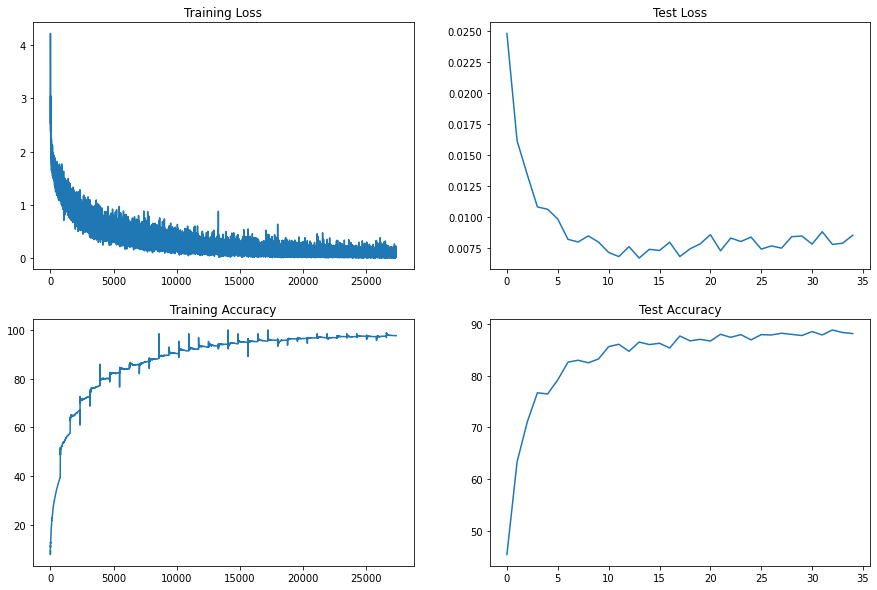

In [17]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train9.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train9.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test9.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test9.test_acc)
axs[1, 1].set_title("Test Accuracy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    car truck horse plane


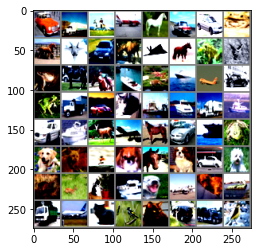

In [18]:
dataiter = iter(loader9.test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [19]:
outputs = model(images.cuda())
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    car truck horse plane


In [20]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(loader9.test_loader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = model(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1
for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 157/157 [00:03<00:00, 51.39it/s]

Accuracy of plane : 92 %
Accuracy of   car : 96 %
Accuracy of  bird : 71 %
Accuracy of   cat : 72 %
Accuracy of  deer : 85 %
Accuracy of   dog : 89 %
Accuracy of  frog : 94 %
Accuracy of horse : 92 %
Accuracy of  ship : 93 %
Accuracy of truck : 91 %


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


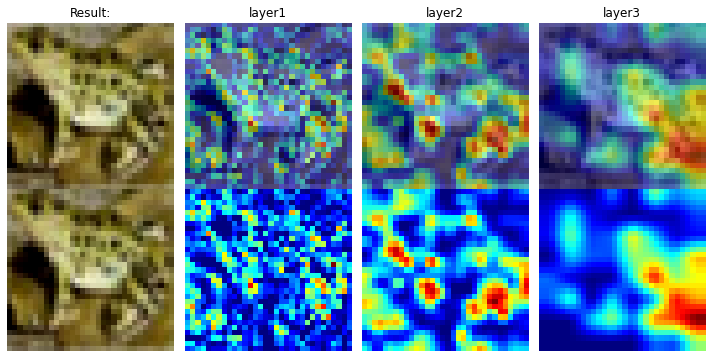

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

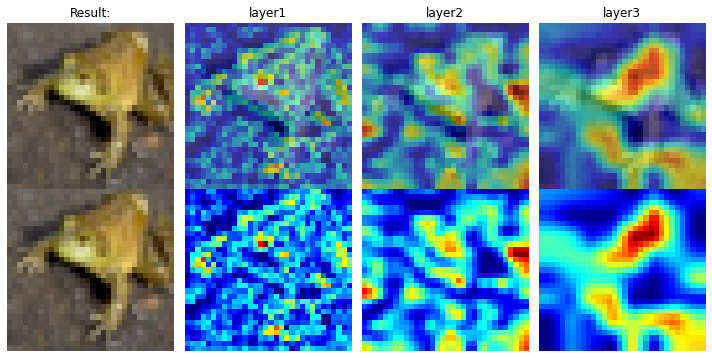

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

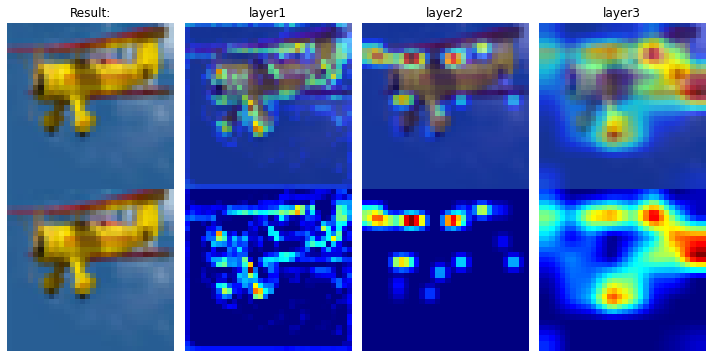

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

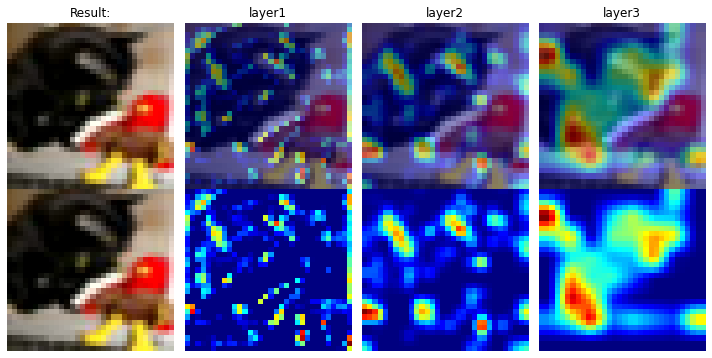

<Figure size 432x288 with 0 Axes>

In [29]:
layers = ['layer1', 'layer2', 'layer3']
grad_cam = GradCAMView(model, layers, device, loader9.mean, loader9.std)
images = [x['image'] for x in random.sample(test9.correct_pred, 4)]
grad_cam(images, "grad_cam")